데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Linear_Regression

출처: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.<br>
데이터: http://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=9068&itemId=0470542810&resourceId=36322

7장<br>
목차<br>
1. Polynomial Regression for One Variable
2. Polynomial Regression for Multiple Variable
3. Nonparametric Regression

# 1. Polynomial Regression for One Variable

<b>1) Polynomial Regression Model</b>

Response가 curvilinear일 때 주로 사용<br>
복잡한 nonlinear 문제나 근사할 때에도 사용 가능<br>

<br>
$y=\beta_{0}+\beta_{1}x+\beta_{2}x_{2}+...+\beta_{k}x_{k}+\epsilon$<br>


Polynomial Regression 사용시 주의 사항<br>
1. 차수는 가능한 낮게<br>
:(k>2)인 경우는 산업적인 지식 없으면 사용 자제<br>
2. 차수 선택시 변수 선택 방법 사용
3. Extrapolation에 매우 취약
4. Ill conditioning<br>
: $(XX)^{-1}$ 계산이 부정확해 질 수 있어 centering 하거나 orthongonal polynomials 고려<br>
5. Ill conditioning2<br>
: x의 범위가 좁으면 심각한 multicollinearity를 겪을 수 있음 예를 들어 1에서 2 범위에서 x는 (1,2) $x^{2}$는 (1,4)에서 변해 x와 $x^{2}$는 심각한 multicollinearity 가능성
6. Hierarchical Model
: 중간에 모든 term을 포함하면 hierarchical=> linear transformation에 invariant<br>
해석력이 좋지만 nonhierarchical model이 예측력에는 더 좋을 수 있음

In [3]:
setwd('C:/Users/bki19/desktop/Linear_Regression/data')

In [4]:
df<-read.csv('./Hardwood.csv')
colnames(df)<-c('x','y')

Hardwood data<br>
Hardwood(견목)의 밀도(x)가 높을 수록 종이백의 강도(y)가 높은지 확인하고 싶음

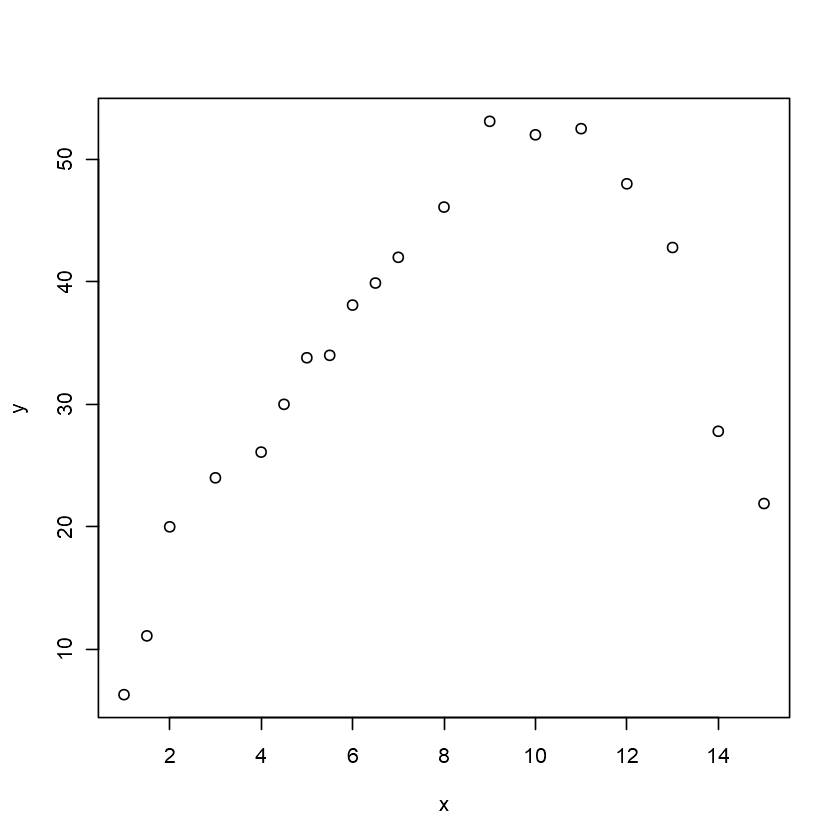

In [5]:
plot(df)

plot의 모형과 산업적 지식을 이용했을 때 quadratic 모델이 적당해 보임

$y=\beta_{0}+\beta_{1}(x-\bar{x})+\beta_{2}(x-\bar{x})^{2}+\epsilon $

In [6]:
df2<-df
df2$x<-df$x-mean(df$x)
df2$x2<-(df$x-mean(df$x))^2
df$x2<-df$x^2

In [7]:
fit2<-lm(y~.,data=df2)

In [8]:
summary(fit2)


Call:
lm(formula = y ~ ., data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8503 -3.2482 -0.7267  4.1350  6.5506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.29497    1.48287   30.55 1.29e-15 ***
x            2.54634    0.25384   10.03 2.63e-08 ***
x2          -0.63455    0.06179  -10.27 1.89e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.42 on 16 degrees of freedom
Multiple R-squared:  0.9085,	Adjusted R-squared:  0.8971 
F-statistic: 79.43 on 2 and 16 DF,  p-value: 4.912e-09


In [9]:
anova(fit2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,1043.4274,1043.42743,53.39985,1.758404e-06
x2,1,2060.8195,2060.81954,105.46729,1.894349e-08
Residuals,16,312.6383,19.53989,NA,NA


$F_{0}=79.43$으로 $\beta_{0}=\beta_{1}=0$이 기각되어 linear term이나 quadratic term이 모형에 유의하게 기여를 하거 있음

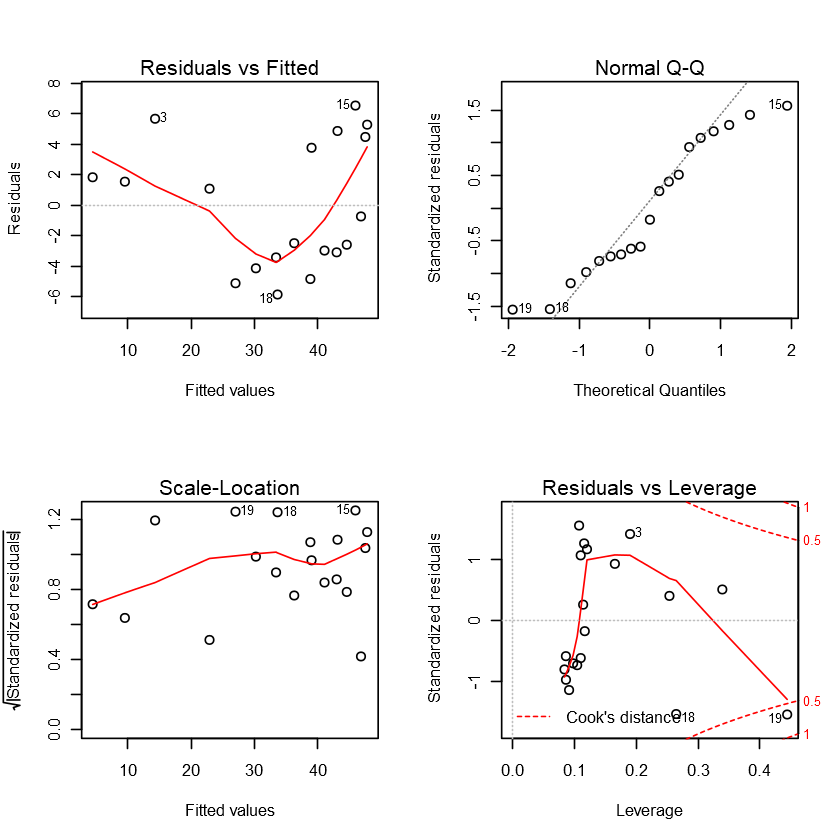

In [10]:
par(mfrow=c(2,2))
plot(fit)

Normal plot으로 봤을 떄 두꺼운 꼬리 존재 해보임 하지만 심각하지는 않아 보임<br>
residual vs fitted로 봤을 때 이상 없어보임<br>
partial test 봤을 때 회귀 계수 모두 유의

그렇다면 quadratic term은 모델에 얼마나 기여하고 있을까?<br>
<br>
$H_{0}:\beta_{2}=0$<br>
Extra-sum-of squares로 확인

In [13]:
fit<-lm(y~.,data=df2[,-3])
summary(fit)


Call:
lm(formula = y ~ ., data = df2[, -3])

Residuals:
    Min      1Q  Median      3Q     Max 
-25.986  -3.749   2.938   7.675  15.840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.1842     2.7108  12.611 4.69e-10 ***
x             1.7710     0.6478   2.734   0.0141 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.82 on 17 degrees of freedom
Multiple R-squared:  0.3054,	Adjusted R-squared:  0.2645 
F-statistic: 7.474 on 1 and 17 DF,  p-value: 0.01414


quadratic term을 빼고 적합했을 때 $R^{2}$ 감소하고 $MS_{Res},se(\hat{\beta_{1}})$은 증가함

In [14]:
anova(fit,fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
17,2373.4578,NA,NA,NA,NA
16,312.6383,1,2060.82,105.4673,1.894349e-08


$SS_{R}(\beta_{2}|\beta_{1},\beta_{0})=2060.82$, $F_{0}=105.4673$으로 $H_{0}$기각<br>
Quadratic term이 모델이 유의하게 기여함

<b>2) Splines: Piecewise Polynomial Fitting</b>

x의 특점 부분에서 y가 다르게 움직이면 polynomial term을 아무리 늘려도 적합이 잘 안됨

x를 sement로 나누어 segment마다 적합<br>
knots: 세그먼트가 나눠지는 부분<br>

<b>Cubic Spline</b><br>
<br>
x를 $t_{1}<t_{2}<....<t_{h}$인 $h$개로 나누는 knot(h)가 known일 때 <br>
$E(y)=S(x)=\sum_{j=0}^{3}\beta_{0j}x^{j}+\sum_{i=1}^{h}\beta_{i}(x-t_{i})_{+}^{3}  $<br>
여기서 $(x-t_{i})_{+}^{3}$는 0 이하이면 0

knot의 위치 설정 방법
- Knot이 known이 아니라 추정해야 되면 nonlinear regression으로 해결해야 됨<br>
- knot를 너무 많이 두면 모델이 flexible해지지만 overfitting 발생 (Wold는 segment 당 최소 4,5개 이상의 데이터를 둘 것을 제안)
- wold는 또한 세그먼트마다 하나 이하의 극값(최소, 최대), 하나 이하의 inflection point를 둘 것을 제안
- 그리고 가능한 극값은 세그먼트의 가운데에 둘 것
- 산업적인 지식이 있으면 도움이 될 수 있음

<b>Cubic B-spline</b>
spline은 knot이 많아질 수록 $(XX)^{-1}$의 계산이 부정확해질 수 있다는 문제가 있음(ill-conditioning)<br>
Cubic B-spline은 이때 사용 가능<br>
<br>
$E(y)=S(x)=\sum_{i=1}^{h+4}\gamma_{i} B_{i}(x)  $<br>
여기서 $B_{i}=\sum_{j=i-4}^{i} [  \frac{(x-t_{j})_{+}^{3}}{\prod _{m=i-4,m\neq j}(t_{j}-t_{m})}      ],i=1,2,..., h+4  $


In [15]:
setwd('C:/Users/bki19/desktop/Linear_Regression/data')

In [16]:
df<-read.csv('./Voltage_Drop.csv')
colnames(df)<-c('x','y')

Voltage Drop data<br>
<br>
- 시간(x)의 변화에 따른 미사일의 비행 중 전압 손실(y)

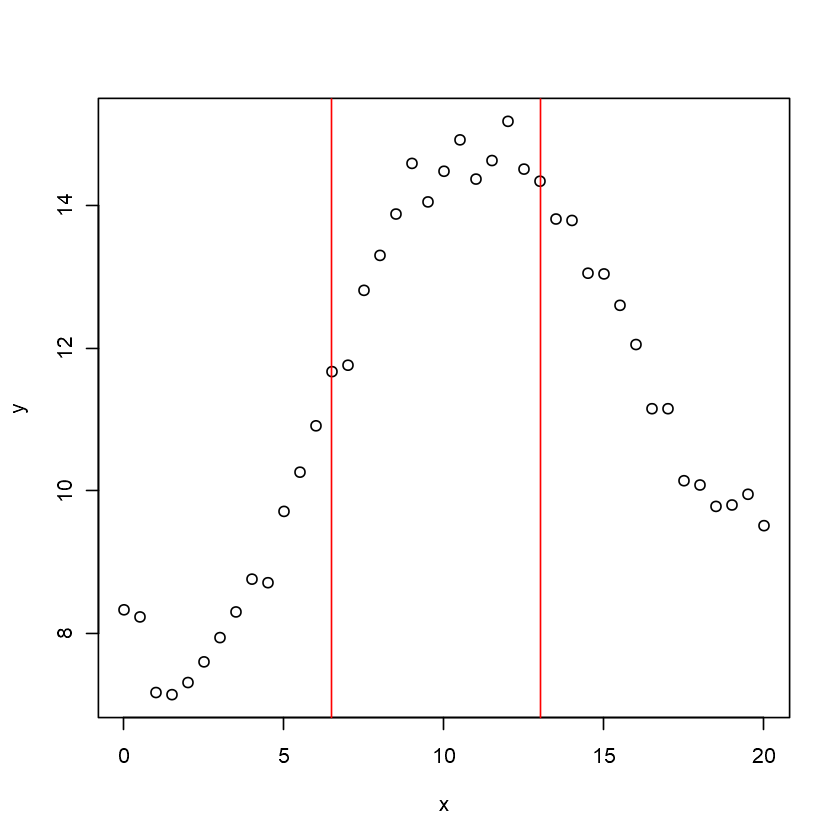

In [21]:
plot(df)
abline(v=6.5,col='red')
abline(v=13,col='red')

$t_{1}=6.5$,$t_{2}=13$으로 knot 설정<br>
Cubic spline과 Polymomial model 비교<br>
Model1:$y=\beta_{00}x^{0}+\beta_{01}x^{1}+\beta_{02}x^{2}+\beta_{03}x^{3}+\beta_{1}(x-6.5)_{+}^{3}+\beta_{1}(x-13)_{+}^{3}  +\epsilon$<br>
Model2:$y=\beta_{0}+\beta_{1}x^{1}+\beta_{2}x^{2}+\beta_{3}x^{3}$

In [23]:
library(splines)
fit_cubic<-lm(y~bs(x,knots=c(6.5,13)), data=df)
summary(fit_cubic)


Call:
lm(formula = y ~ bs(x, knots = c(6.5, 13)), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45168 -0.18499 -0.03547  0.20577  0.61694 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  8.4657     0.2005  42.219  < 2e-16 ***
bs(x, knots = c(6.5, 13))1  -3.1484     0.3934  -8.002 2.04e-09 ***
bs(x, knots = c(6.5, 13))2   4.3532     0.2843  15.312  < 2e-16 ***
bs(x, knots = c(6.5, 13))3   8.5518     0.3691  23.169  < 2e-16 ***
bs(x, knots = c(6.5, 13))4   0.5990     0.3059   1.958 0.058192 .  
bs(x, knots = c(6.5, 13))5   1.2414     0.2871   4.324 0.000121 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2678 on 35 degrees of freedom
Multiple R-squared:  0.9904,	Adjusted R-squared:  0.9891 
F-statistic: 725.5 on 5 and 35 DF,  p-value: < 2.2e-16


In [24]:
df2<-df
df2$x2<-df$x^2
df2$x3<-df$x^3
fit_poly<-lm(y~.,data=df2)
summary(fit_poly)


Call:
lm(formula = y ~ ., data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3503 -0.7340 -0.1859  0.6440  1.8390 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.4910163  0.5336473  12.163 1.71e-14 ***
x            0.7031952  0.2339552   3.006 0.004738 ** 
x2           0.0340179  0.0273762   1.243 0.221829    
x3          -0.0033072  0.0008992  -3.678 0.000743 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9335 on 37 degrees of freedom
Multiple R-squared:  0.8773,	Adjusted R-squared:  0.8673 
F-statistic: 88.14 on 3 and 37 DF,  p-value: < 2.2e-16


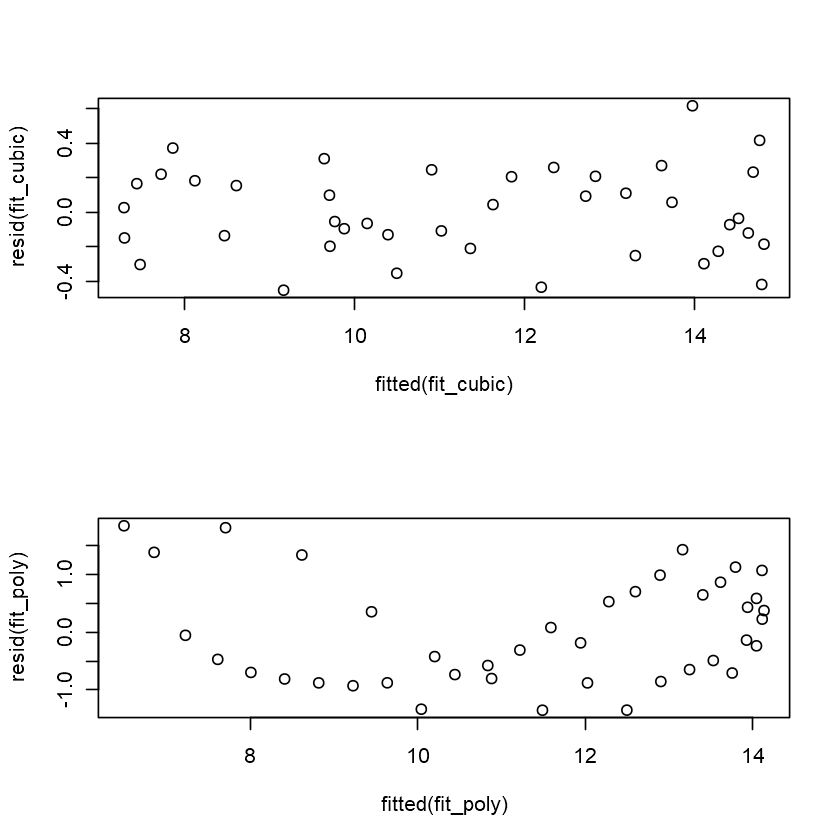

In [25]:
par(mfrow=c(2,1))
plot(fitted(fit_cubic),resid(fit_cubic))
plot(fitted(fit_poly),resid(fit_poly))

파리미터가 더 적은 polynomial과 비교<br>
polynomial의 경우 residual plot 봤을 때 강한 곡선의 관계가 나타나 적합하지 않음을 알 수 있음

Extra-sym-of squares를 통해 Model1의 적합성이 더 좋아졌는지 확인<br>
$H_{0}:\beta_{1}=\beta_{2}=0$<br>

In [27]:
anova(fit_poly,fit_cubic)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
37,32.244231,NA,NA,NA,NA
35,2.510255,2,29.73398,207.2876,3.955041e-20


$SS_{R}(\beta_{1},\beta_{2}|\beta_{00},\beta_{01},\beta_{02},\beta_{03})=29.73398$, $F_{0}=207.2876$으로 $H_{0}$기각<br>
=> Cubic Pline의 적합성이 더 좋음

# 2. Polynomial Regression for Multiple Variable

<b>1) Interaction effect</b><br>
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{11}x_{1}^{2}+\beta_{22}x_{2}^{2}+\beta_{12}x_{1}x_{2}+\epsilon$

In [28]:
df<-read.csv('./Chemical Process.csv')

Chemical Process Example<br>
<br>
- 반응온도(T),reactant concentraion(C)와 percent conversion of a chemical process(y)의 관계를 연구
- 최적화를 위해 T,C에 quadratic term 추가<br>
<br>
Central composite design<br>
- x1,x2: T와 C를 각각 -1.414,-1,0,1,1.414 5개의 수준으로 설정

In [43]:
df2=data.frame(x1=df$x1,x2=df$x2,x1_2=(df$x1)^2,x2_2=(df$x2)^2,x1x2=df$x1*df$x2,y=df$y   )
df3=data.frame(C=df$C,T=df$T,C_2=(df$C)^2,T_2=(df$T)^2,CT=df$C*df$T,y=df$y   )

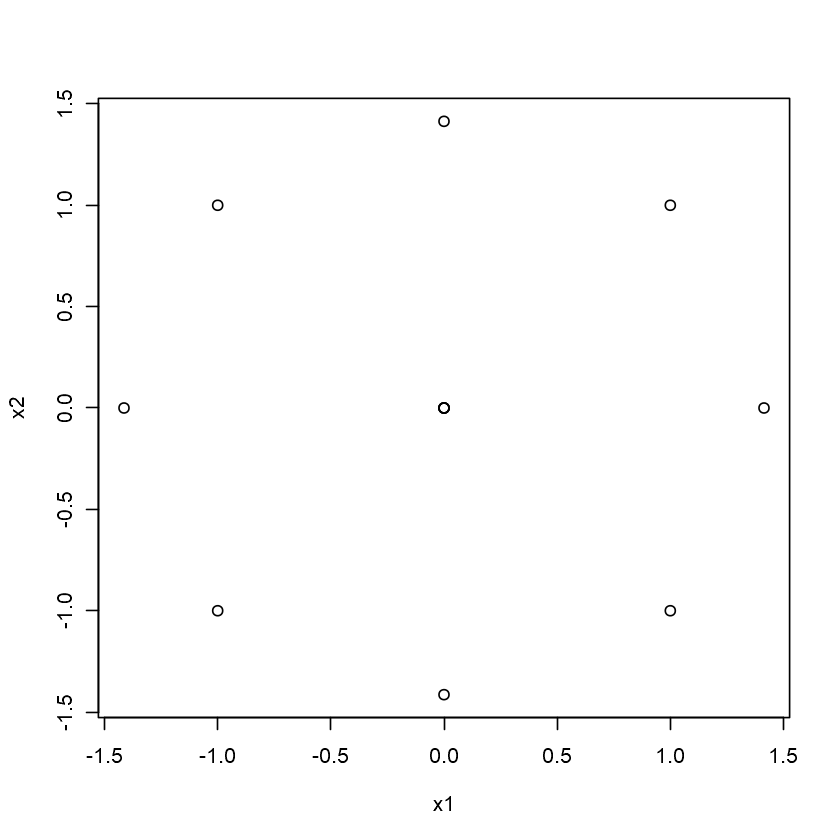

In [44]:
plot(df[,c(4,5)])

In [45]:
fit<-lm(y~.,data=df2)
summary(fit)


Call:
lm(formula = y ~ ., data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7500 -0.9938 -0.0021  1.1459  3.2500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  79.7500     1.2135  65.717 8.35e-10 ***
x1            9.8255     0.8582  11.449 2.66e-05 ***
x2            4.2164     0.8582   4.913 0.002675 ** 
x1_2         -8.8766     0.9596  -9.250 9.02e-05 ***
x2_2         -5.1255     0.9596  -5.341 0.001759 ** 
x1x2         -7.7500     1.2135  -6.386 0.000694 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.427 on 6 degrees of freedom
Multiple R-squared:   0.98,	Adjusted R-squared:  0.9634 
F-statistic: 58.86 on 5 and 6 DF,  p-value: 5.117e-05


In [46]:
fit2<-lm(y~.,data=df3)
summary(fit2)


Call:
lm(formula = y ~ ., data = df3)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7500 -0.9938 -0.0021  1.1459  3.2500 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.106e+03  9.270e+01 -11.927 2.10e-05 ***
C            2.299e+01  2.675e+00   8.594 0.000136 ***
T            8.024e+00  7.185e-01  11.168 3.07e-05 ***
C_2         -2.050e-01  3.838e-02  -5.341 0.001759 ** 
T_2         -1.420e-02  1.535e-03  -9.250 9.02e-05 ***
CT          -6.200e-02  9.708e-03  -6.386 0.000694 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.427 on 6 degrees of freedom
Multiple R-squared:   0.98,	Adjusted R-squared:  0.9634 
F-statistic: 58.86 on 5 and 6 DF,  p-value: 5.117e-05


위의 데이터의 결과는 x1,x2를 이용한 결과이고 아래는 원래 데이터를 이용해서 때의 결과<br>
F test를 했을 때 p-value가 매우 작아 모형이 유의<br>
모든 회귀 계수가 유의

# 3. Nonparametric Regression

데이터의 범위 밖을 예측할 때 모델에서 자유롭게 예측

<b> LOESS: Locally Weighted Regression</b>

- 특정한 위치 근처의 데이터를 사용<br>
- span: 군집(neighborhood)를 만들기 위해 총 데이터에서 사용할 데이터의 비율 (예를들어 0.5이면 총 데이터 중 가장가까운 절반을 사용)<br>
- 군집의 데이터를 바탕으로 WLS 방식 사용
- 주로 linear 나 quadratic 같은 낮은 차원 사용


Tri-cube weight<br>
$x_{0}$: 특정한 지점의 위치라고 할때 <br>
Tri-cube weight 함수는 $W[ \frac{|x_{0}-x_{j}|}{\Delta(x_{0})}  ]$<br>
여기서 $\Delta(x_{0})$는 $x_{0}$와 군집에서 가장 먼 데이터의 거리<br>
$W(t)=(1-t^{3})^{3}, 0<t<1$ 그밖에는 0

In [50]:
df<-read.csv('./Windmill.csv')
colnames(df)<-c('Velocity','Output')

The Windmill Data<br>
풍속에 따라 전력 발전을 얼마나 하는지

In [51]:
fit_loess<-loess(Output~Velocity,data=df)

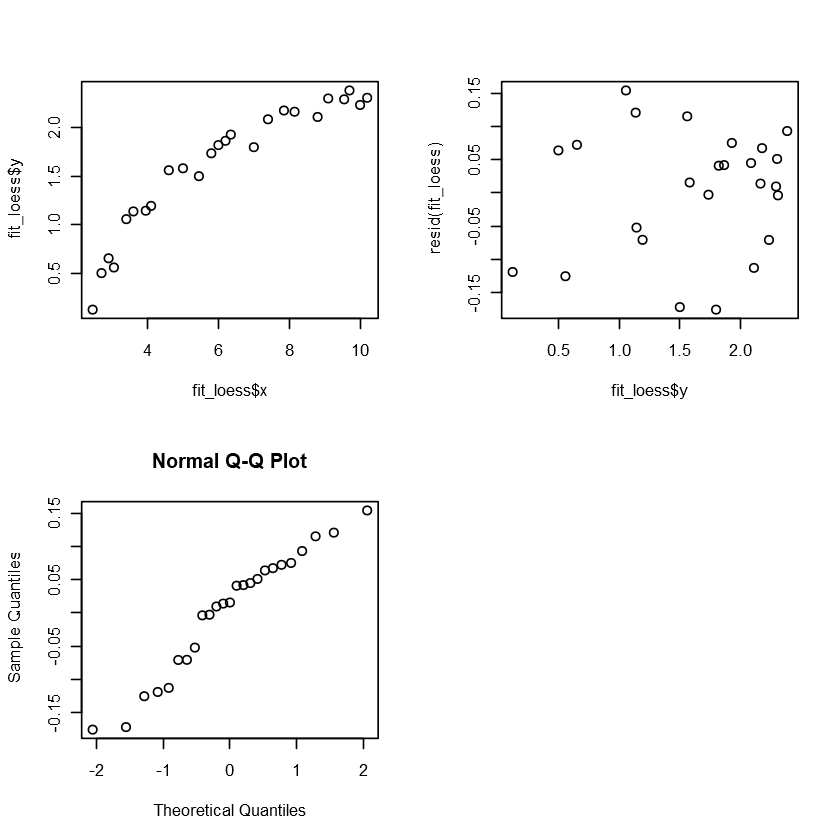

In [52]:
par(mfrow=c(2,2))
plot(fit_loess)
plot( fit_loess$y, resid(fit_loess))
qqnorm(resid(fit_loess))

Normality 봤을 때 완벽하지는 않지만 심각한 문제는 없어 보임 <br>
위의 LSE와 1/x transformation 보다 나아 보임<br>
Parameter 수 : Cubic spline>LOESS>Polynomial>simple linear<br>
Loess는 복잡성 떄문에 black box의 경향 있음

Parametric model vs Nonparametric model<br>
<br>
- Parametric model은 주로 관련 분야의 배경 지식을 이용함
- Nonparametric model은 데이터를 경험적으로 이용함
- 관련 산업에서 사용되는 transformation을 이용할 수 있으면 단순한 Parametric model을 선호해야 됨 (단순한 모델이 해석력이 좋기 때문)
- 산업에 대한 지식이 없고 단순한 Parametric model을 사용했을 때 모델 적합성이 안 좋다면 Nonparametric model의 사용을 고려해야 함
- 하지만 모델의 복잡성이나 해석이 잘 안 되는 black box적인 특징을 감안해야 함
